In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display

file_path = 'LJ037-0171.wav'
data, sample_rate = sf.read(file_path)
info = sf.info(file_path)

print(f"--- Objective 1: Audio Information ---")
print(f"Sampling Rate: {sample_rate} Hz")
print(f"Bit Depth: {info.subtype}") 
print(f"Number of Channels: {info.channels}")

--- Objective 1: Audio Information ---
Sampling Rate: 22050 Hz
Bit Depth: PCM_16
Number of Channels: 1


Total Samples: 167226
Total Duration: 7.58 seconds
Active Speech Duration: 7.41 seconds


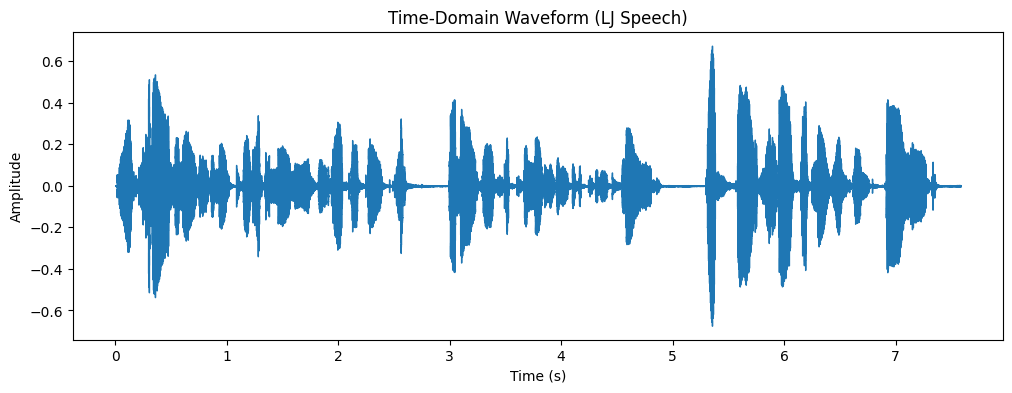

In [ ]:
y, sr = librosa.load(file_path, sr=None)
total_duration = len(y) / sr
yt, index = librosa.effects.trim(y, top_db=30)
active_duration = len(yt) / sr

print(f"Total Samples: {len(y)}")
print(f"Total Duration: {total_duration:.2f} seconds")
print(f"Active Speech Duration: {active_duration:.2f} seconds")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Time-Domain Waveform (LJ Speech)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

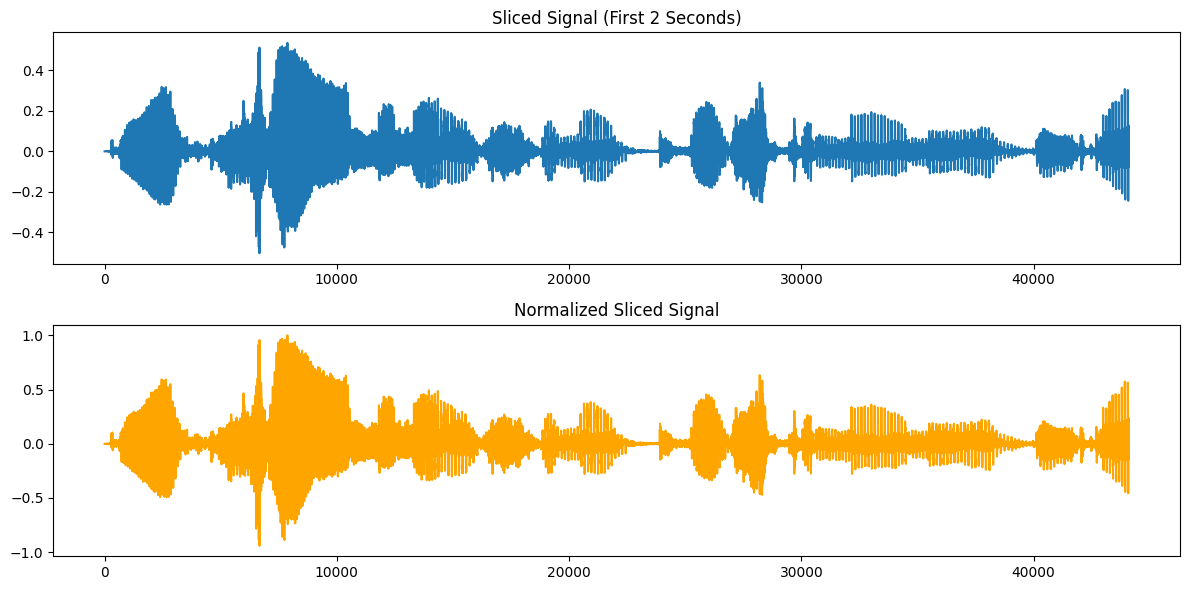

In [9]:
# Slicing: Extract first 2 seconds 
first_2_sec = y[:2 * sr]

# Normalization: Scaling to range [-1, 1] 
normalized_y = librosa.util.normalize(first_2_sec)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(first_2_sec)
plt.title("Sliced Signal (First 2 Seconds)")

plt.subplot(2, 1, 2)
plt.plot(normalized_y, color='orange')
plt.title("Normalized Sliced Signal")
plt.tight_layout()
plt.show()

Original shape: (167226,)
Down-sampled shape: (60672,)


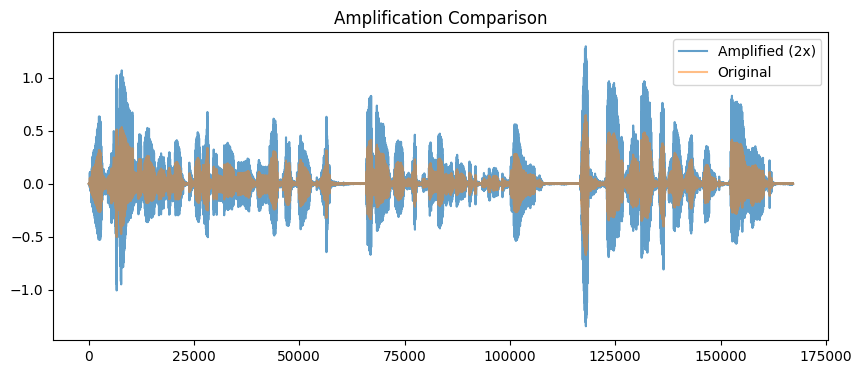

In [ ]:
amplified = y * 2.0
de_amplified = y * 0.5
y_down = librosa.resample(y, orig_sr=sr, target_sr=8000)
y_up = librosa.resample(y, orig_sr=sr, target_sr=44100)

print(f"Original shape: {y.shape}")
print(f"Down-sampled shape: {y_down.shape}")
plt.figure(figsize=(10, 4))
plt.plot(amplified, label='Amplified (2x)', alpha=0.7)
plt.plot(y, label='Original', alpha=0.5)
plt.legend()
plt.title("Amplification Comparison")
plt.show()

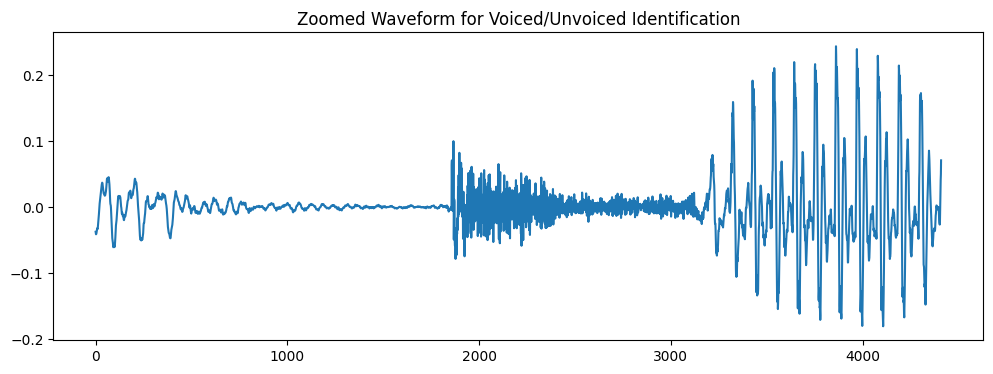

In [ ]:
start_sample = int(sr * 1.0) 
end_sample = int(sr * 1.2)   
zoom_y = y[start_sample:end_sample]

plt.figure(figsize=(12, 4))
plt.plot(zoom_y)
plt.title("Zoomed Waveform for Voiced/Unvoiced Identification")
plt.show()